In [1]:
from functools import lru_cache
from src.data_structures import Instance
from src.solvers.collection import SolverCollection,SolverConfig,VAR_TYPE
import pandas as pd

 

Solving 0
Solving 1
Solving 2
Solving 3
Solving 4
Solving 5
Solving 6
Solving 7
Solving 8
Solving 9
Solving 10
Solving 11
Solving 12
Solving 13
Solving 14
Solving 15
Solving 16
Solving 17
Solving 18
Solving 19
Solving 20
Solving 21
Solving 22
Solving 23
Solving 24
Solving 25
Solving 26
Solving 27
Solving 28
Solving 29
Solving 30
Solving 31
Solving 32
Solving 33
Solving 34
Solving 35
Solving 36
Solving 37
Solving 38
Solving 39
Solving 40
Solving 41
Solving 42
Solving 43
Solving 44
Solving 45
Solving 46
Solving 47
Solving 48
Solving 49
Solving 50
Solving 51
Solving 52
Solving 53
Solving 54
Solving 55
Solving 56
Solving 57
Solving 58
Solving 59
Solving 60
Solving 61
Solving 62
Solving 63
Solving 64
Solving 65
Solving 66
Solving 67
Solving 68
Solving 69
Solving 70
Solving 71
Solving 72
Solving 73
Solving 74
Solving 75
Solving 76
Solving 77
Solving 78
Solving 79
Solving 80
Solving 81
Solving 82
Solving 83
Solving 84
Solving 85
Solving 86
Solving 87
Solving 88
Solving 89
Solving 90
Solving 9

,o,cont_sol,profit,l_cost,u_cost,is_in_opt_sol
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.012346,0.527740,0.082021,0.029800,0.047489,0.506900
std,0.003592,0.465073,0.032107,0.019047,0.031520,0.499977
min,0.005488,0.000000,0.027155,0.000806,0.001048,-0.000000
25%,0.009463,0.000000,0.057725,0.014294,0.022421,0.000000
50%,0.012060,0.631348,0.075162,0.027488,0.042770,1.000000
75%,0.014852,1.000000,0.103297,0.042208,0.067044,1.000000
max,0.022436,1.000000,0.193335,0.095271,0.178659,1.000000


In [ ]:
features_df.to_csv("/home/mixto/repositories/newPRKP/train.csv")

SuggestedLRs(slide=0.033113110810518265, valley=0.015848932787775993)


epoch,train_loss,valid_loss,accuracy,time
0,0.231039,0.194509,0.924000,00:00
1,0.225925,0.192201,0.929500,00:00


,o,cont_sol,profit,l_cost,u_cost,is_in_opt_sol,is_in_opt_sol_pred
0,0.010967,1.000000,0.068683,0.006520,0.012389,1.0,1.0
1,0.009325,0.000000,0.054842,0.033271,0.053234,0.0,0.0
2,0.009471,0.496336,0.071221,0.032645,0.062025,1.0,0.0
3,0.007350,0.000000,0.037950,0.026278,0.049928,0.0,0.0
4,0.015276,0.461550,0.113534,0.032991,0.062682,1.0,0.0
5,0.013010,1.000000,0.069032,0.008321,0.013314,1.0,1.0
6,0.009112,0.000000,0.055641,0.056244,0.073118,0.0,0.0
7,0.008174,0.000000,0.054252,0.036010,0.057617,0.0,0.0
8,0.015830,1.000000,0.129641,0.020283,0.032453,1.0,1.0


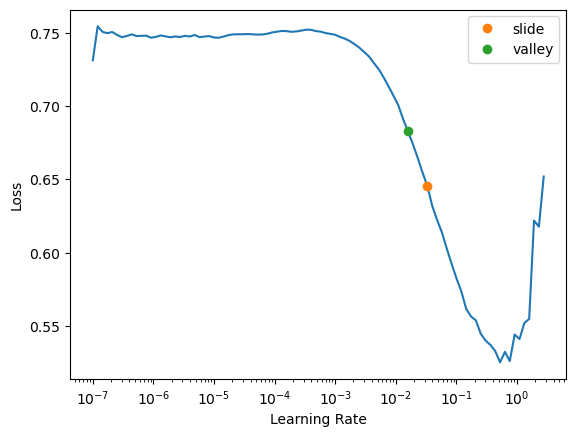

In [3]:
from src.solvers.collection import SolverCollection
from src.data_structures import Instance
from src.solvers.gurobi import SolverConfig
from torch import tensor
import torch
import pandas as pd
from fastai.tabular.all import RandomSplitter,TabularPandas,Categorify,CategoryBlock,TabularDataLoaders,RegressionBlock
from fastai.tabular.all import tabular_learner,accuracy,slide,valley, Normalize,FillMissing
#Col dep


#train_data = pd.read_csv("/home/mixto/repositories/newPRKP/train.csv")
#train_data.describe()

train_data = features_df
train_data.describe()

splits = RandomSplitter(seed=42)(train_data)
dls = TabularPandas(
        train_data,
        splits = splits,
        procs = [],
        cat_names = [],
        cont_names = ["o","cont_sol","profit","l_cost","u_cost"],
        y_names =["is_in_opt_sol"],
        y_block = CategoryBlock()
        ).dataloaders(path=".",bs=64)
learn = tabular_learner(dls,metrics=accuracy,layers=[10])
a = learn.lr_find(suggest_funcs=(slide, valley))
learn.fit(2,lr=(a[1]+a[0])/2)
learn.show_results()








In [2]:
instance = Instance.generate(10000,100)
print("Generated instance")
#instance.precalcs()
print("Calculating features")
features = instance.features()
data = pd.DataFrame(features,columns=["o","cont_sol","profit","l_cost","u_cost"])
test_dl = learn.dls.test_dl(data)
print("Getting Predictions")
preds, targets = learn.get_preds(dl=test_dl,reorder=True)

def elevate(x):
    if x > 0.5:
        return 1
    else:
        return 0

sol_dl = preds[:,1]
sol_dl = list(map(lambda x:elevate(x),sol_dl ))
#opt_sol = SolverCollection.gurobi(instance,SolverConfig.continous())[1]
#optimal_sol, cont_sol, _ = SolverCollection.gurobi(instance,SolverConfig.optimal())


def compare_sols(opt_sol,cont_sol):
    equals = 0
    different = 0 
    for i,v in enumerate(opt_sol):
        if int(opt_sol[i]) == int(cont_sol[i]):
            equals += 1
        else:
            different += 1
    print(equals/(equals+different))

print("Solving with baldo ML")
baldo_o, sol_ml, _  = SolverCollection.baldo_ML(instance)

from time import time
start = time()
print(sol_ml)
print(f"Ml: {time() - start}")
start = time()
print(sol_dl)
print(f"DL: {time() - start}")
#compare_sols(sol_dl,opt_sol)








Generated instance
Calculating features


TypeError: cannot unpack non-iterable Solution object

In [ ]:
from src.solvers.MLHeu.functions_ml import prepare_set,fix_variables
from src.solvers.gurobi import VAR_TYPE

y_ml = fix_variables(instance.n_items, preds, 0.85)
discrete_config = SolverConfig(VAR_TYPE.BINARY,True,y_ml)
o, final_sol,_ = SolverCollection.gurobi(instance,discrete_config)

Set parameter Username


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
compare_sols(final_sol,sol_ml)

ZeroDivisionError: division by zero

In [ ]:
print(o,baldo_o)

327213.40119858336 326674.273975966


In [ ]:
o, optimal, _ = SolverCollection.gurobi(instance,SolverConfig.optimal())

In [ ]:
print(o)

327272.57156632014


In [ ]:
instance.solution = optimal
instance.objective = o
instance.save("")